In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pyplot

## Loads the VGG16 model (pretrained)

In [27]:
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')
vgg_model.summary()
vgg_model.layers

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 2. load image data

In [28]:
run_code = True
if run_code:
    num_classes = 3
    input_shape = (224, 224, 3)
    base_path = '../imageclassifier-main/data/'
    x_train, x_test, y_train, y_test = [], [], [], []
    classes = ['bottle', 'glasses', 'pen']
    classes_test = ['bottle_test', 'glasses_test', 'pen_test']
    
    # load train data
    for target in classes:
        files = os.listdir(os.path.join(base_path, target))
        for file in files:
            img = load_img(os.path.join(base_path, target, file), color_mode='rgb')
            x_train.append(img_to_array(img))
            y_train.append(classes.index(target))
    
    # load test data
    for target in classes_test:
        files = os.listdir(os.path.join(base_path, target))
        for file in files:
            img = load_img(os.path.join(base_path, target, file), color_mode='rgb')
            x_test.append(img_to_array(img))
            y_test.append(classes_test.index(target))
    
    # change the list to a numpy array
    X_train = np.array(x_train)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(x_test)
    y_test = np.array(y_test).reshape(-1, 1)

## 2. use the pretrained model without retraining

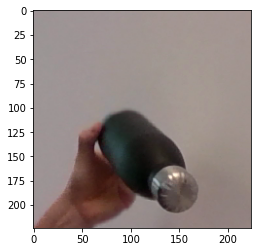

bottle  --->  predicted:  680
[[('n03825788', 'nipple', 0.5496114), ('n03935335', 'piggy_bank', 0.26828307), ('n09229709', 'bubble', 0.024941247), ('n04286575', 'spotlight', 0.0128974235), ('n04579432', 'whistle', 0.010604812)]]


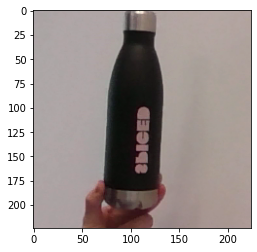

bottle  --->  predicted:  737
[[('n03983396', 'pop_bottle', 0.356492), ('n02823428', 'beer_bottle', 0.18729942), ('n04557648', 'water_bottle', 0.17321324), ('n04376876', 'syringe', 0.06865592), ('n04591713', 'wine_bottle', 0.06004901)]]


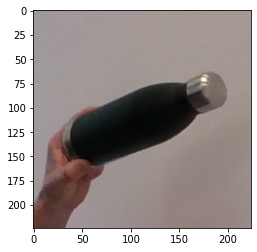

bottle  --->  predicted:  845
[[('n04376876', 'syringe', 0.1374827), ('n03825788', 'nipple', 0.12316961), ('n03759954', 'microphone', 0.10747051), ('n09229709', 'bubble', 0.07886457), ('n03720891', 'maraca', 0.059534524)]]


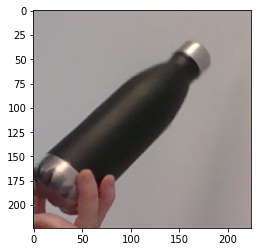

bottle  --->  predicted:  666
[[('n03786901', 'mortar', 0.31832328), ('n02951585', 'can_opener', 0.09239375), ('n03759954', 'microphone', 0.0776739), ('n04579432', 'whistle', 0.058098108), ('n04376876', 'syringe', 0.052478105)]]


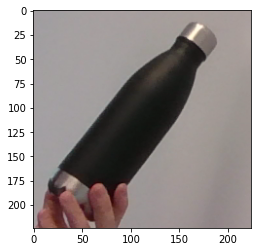

bottle  --->  predicted:  666
[[('n03786901', 'mortar', 0.21305393), ('n03759954', 'microphone', 0.09608058), ('n04376876', 'syringe', 0.07708417), ('n04591713', 'wine_bottle', 0.05644495), ('n04154565', 'screwdriver', 0.04661994)]]


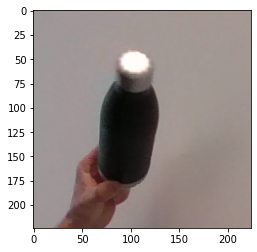

bottle  --->  predicted:  845
[[('n04376876', 'syringe', 0.49746087), ('n03825788', 'nipple', 0.14600572), ('n04557648', 'water_bottle', 0.058625694), ('n03690938', 'lotion', 0.027826032), ('n02783161', 'ballpoint', 0.025358178)]]


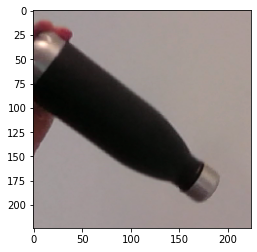

bottle  --->  predicted:  845
[[('n04376876', 'syringe', 0.10628841), ('n03759954', 'microphone', 0.0886057), ('n04286575', 'spotlight', 0.083389066), ('n03825788', 'nipple', 0.07807488), ('n02951585', 'can_opener', 0.048298217)]]


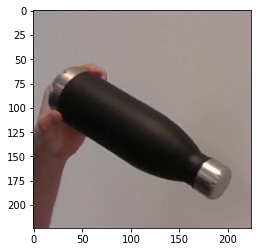

bottle  --->  predicted:  680
[[('n03825788', 'nipple', 0.26099902), ('n03786901', 'mortar', 0.1138977), ('n04579432', 'whistle', 0.075905085), ('n03970156', 'plunger', 0.060737964), ('n04154565', 'screwdriver', 0.058175247)]]


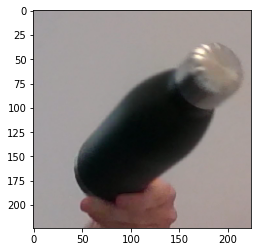

bottle  --->  predicted:  680
[[('n03825788', 'nipple', 0.29705617), ('n04286575', 'spotlight', 0.09924869), ('n04376876', 'syringe', 0.066363245), ('n03786901', 'mortar', 0.04123255), ('n04557648', 'water_bottle', 0.033238266)]]


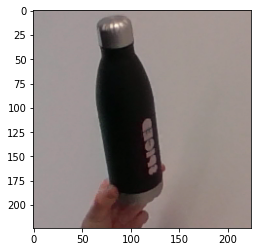

bottle  --->  predicted:  898
[[('n04557648', 'water_bottle', 0.17950971), ('n02823428', 'beer_bottle', 0.11682903), ('n04376876', 'syringe', 0.087978266), ('n04591713', 'wine_bottle', 0.074605964), ('n03759954', 'microphone', 0.06667461)]]


In [29]:
run_code = True
if run_code:
    # predict X_test with the pretrained model
    prediction = vgg_model.predict(
        X_test,
        batch_size=None,
        verbose='auto',
        steps=None,
        callbacks=None,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False
    )
    # plot the test images and print top 5 predictions
    images = [array_to_img(array) for array in X_test]        
    for image, y_predict, y_test in zip(images[:10], prediction[:10], y_test[:10]):
        pyplot.imshow(image)
        pyplot.show()
        y_predict = y_predict.reshape(1,-1)
        print(f"{classes[np.argmax(y_test)]}  --->  predicted:  {np.argmax(y_predict)}") #{classes[np.argmax(y_predict)]} {y_predict} )
        y_predict.reshape(1,-1)
        print(decode_predictions(y_predict, top = 5))

## 3. retrain the VGG16-model

In [30]:
# load the Convolutional Layers
base_model = keras.applications.vgg16.VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)

In [31]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
# freeze the conv_layers
for layers in base_model.layers[:]: 
    layers.trainable = False # --> all layers frozen means they are not trainable
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 4. load and edit image data and train test split

In [33]:
run_code = True
if run_code:
    # load the files
    num_classes = 3
    input_shape = (224, 224, 3)
    base_path = '../imageclassifier-main/data/'
    x_train, x_test, y_train, y_test = [], [], [], []
    classes = ['bottle', 'glasses', 'pen']
    classes_test = ['bottle_test', 'glasses_test', 'pen_test']
    
    # load train data
    for target in classes:
        files = os.listdir(os.path.join(base_path, target))
        for file in files:
            img = load_img(os.path.join(base_path, target, file), color_mode='rgb')
            x_train.append(img_to_array(img))
            y_train.append(classes.index(target))
    
    # load test data
    for target in classes_test:
        files = os.listdir(os.path.join(base_path, target))
        for file in files:
            img = load_img(os.path.join(base_path, target, file), color_mode='rgb')
            x_test.append(img_to_array(img))
            y_test.append(classes_test.index(target))
    # change the list to a numpy array
    X_train = np.array(x_train)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(x_test)
    y_test = np.array(y_test).reshape(-1, 1)

In [34]:
# shuffle the train and test data
shuffler_train = np.random.permutation(len(X_train))
shuffler_test = np.random.permutation(len(X_test))

X_train = X_train[shuffler_train]
y_train = y_train[shuffler_train]

X_test = X_test[shuffler_test]
y_test = y_test[shuffler_test]

In [35]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# change y to categorical values
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(636, 224, 224, 3) (90, 224, 224, 3) (636, 3) (90, 3)


In [36]:
# create a new model with Dens layers

# define the keras model
model = keras.Sequential(
    [
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [37]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', #the thing we are monitoring
    min_delta=0.005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience=1, #number of epochs with no improvement needed for t%he model to stop
    verbose=1, #0 is silent, 1 means a message is displayed when something happens
)

In [38]:
rc = False
if rc:
    # define the batch size and number of epochs
    batch_size = 20
    epochs = 20

    # complile and define eval metric
    model.compile(loss="categorical_crossentropy", 
                    optimizer="adam", 
                    metrics=["accuracy"])

    # fit the model
    hist = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1,
                    callbacks=[early_stop]) #early_stop

    # evaluate the model and print the results
    score = model.evaluate(X_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])